In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

In [3]:
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

In [4]:
df_features = df_features.rename(columns=colNames)
df_features.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [5]:
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
print('Shape of classes', df_classes.shape)
print('Shape of edges', df_edges.shape)
print('Shape of features', df_features.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


<BarContainer object of 3 artists>

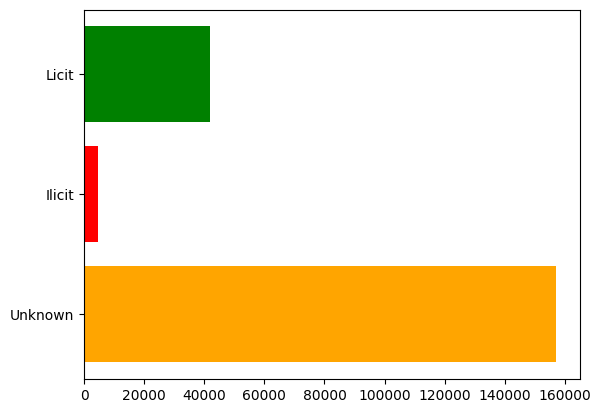

In [6]:
group_class = df_classes.groupby('class').count()
plt.barh(['Unknown', 'Ilicit', 'Licit'], group_class['txId'].values, color=['orange', 'r', 'g'] )

Text(0.5, 1.0, 'Number of transactions by Time step')

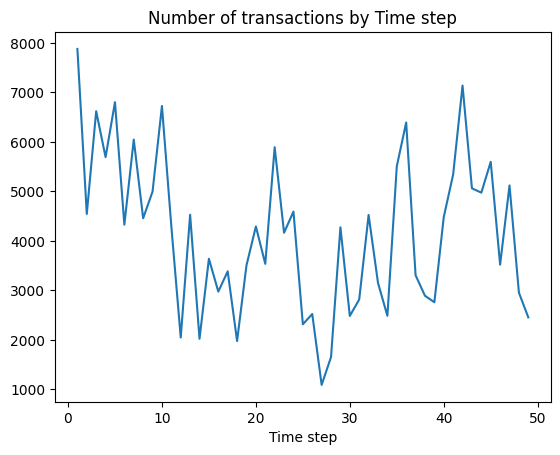

In [7]:
group_feature = df_features.groupby('Time step').count()
group_feature['txId'].plot()
plt.title('Number of transactions by Time step')

In [8]:
# Merge Class and features
df_class_feature = pd.merge(df_classes, df_features )
df_class_feature.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [9]:
group_class_feature = df_class_feature.groupby(['Time step', 'class']).count()
#plt.barh(['Unknown', 'Ilicit', 'Licit'], group_class['txId'].values, color=['orange', 'r', 'g'] )
group_class_feature = group_class_feature['txId'].reset_index().rename(columns={'txId': 'count'})#unstack()
group_class_feature.head()

,Time step,class,count
0,1,3,5733
1,1,1,17
2,1,2,2130
3,2,3,3427
4,2,1,18


<Axes: xlabel='Time step', ylabel='count'>

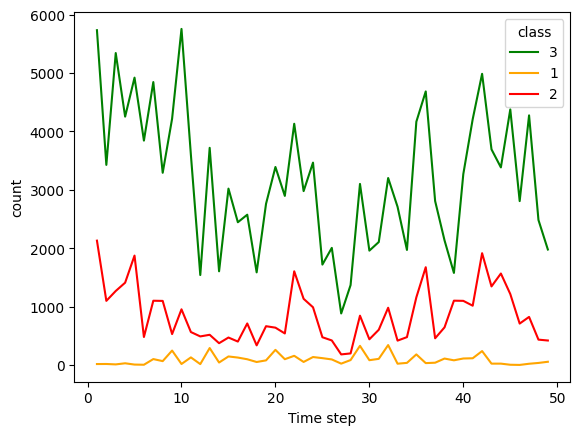

In [10]:
sns.lineplot(x='Time step', y='count', hue='class', data = group_class_feature, palette=['g', 'orange', 'r'] )

Text(0.5, 0, 'Time step')

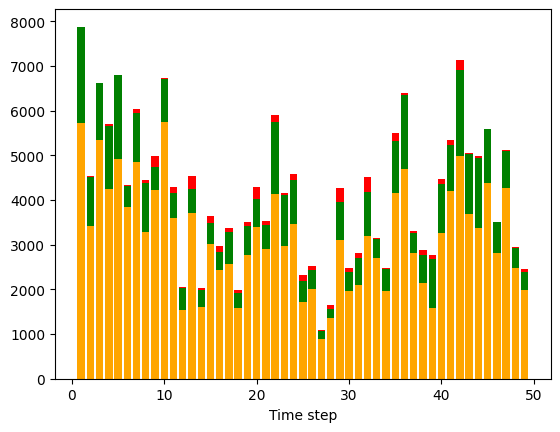

In [11]:
class1 = group_class_feature[group_class_feature['class'] == '1']
class2 = group_class_feature[group_class_feature['class'] == '2']
class3 = group_class_feature[group_class_feature['class'] == 3 ]

p1 = plt.bar(class3['Time step'], class3['count'], color = 'orange')

p2 = plt.bar(class2['Time step'], class2['count'], color='g',
             bottom=class3['count'])

p3 = plt.bar(class1['Time step'], class1['count'], color='r',
             bottom=np.array(class3['count'])+np.array(class2['count']))

plt.xlabel('Time step')

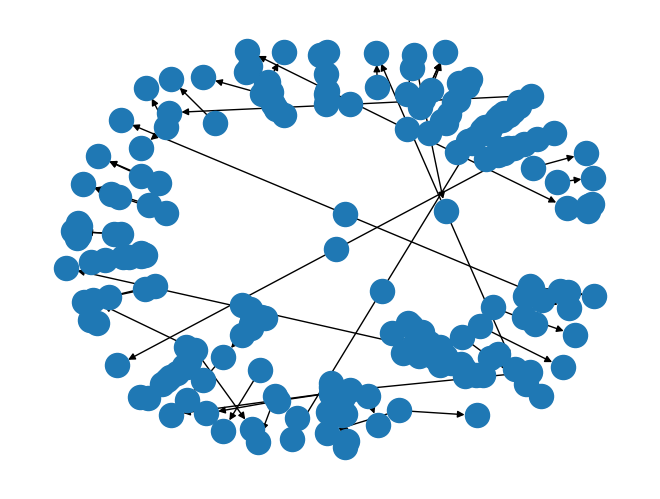

In [12]:
ilicit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == '1'), 'txId']
ilicit_edges = df_edges.loc[df_edges['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

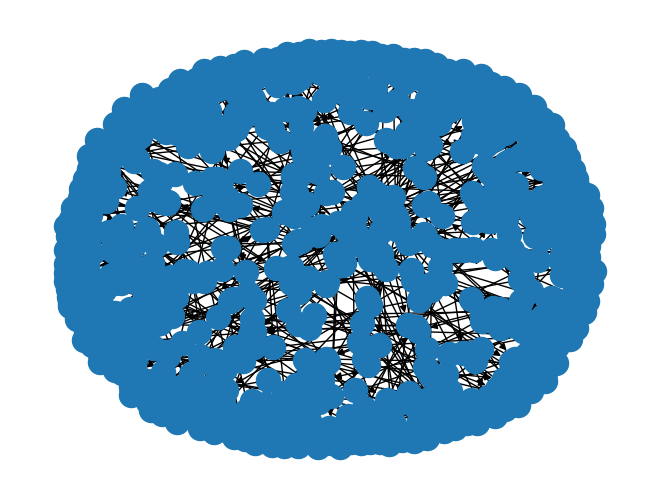

In [13]:
licit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == '2'), 'txId']
licit_edges = df_edges.loc[df_edges['txId1'].isin(licit_ids)]

graph = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [15]:
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and features
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected )
df_class_feature_selected.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [16]:
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y = df_class_feature_selected[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y = y['class'].apply(lambda x: 0 if x == '2' else 1 )

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [18]:
model_RF = RandomForestClassifier().fit(X_train.values,y_train.values)
y_preds = model_RF.predict(X_test.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

Random Forest Classifier
Precision:0.997 
Recall:0.886 
F1 Score:0.938


In [19]:
unknown_ids = df_class_feature.loc[(df_class_feature['class'] == 3), 'txId']

df_edges_unknown = df_edges.loc[df_edges['txId1'].isin(unknown_ids)]
df_classes_unknown = df_classes.loc[df_classes['txId'].isin(unknown_ids)]
df_features_unknown = df_features.loc[df_features['txId'].isin(unknown_ids)]

In [20]:
X_unknown = df_features_unknown.drop(columns=['txId', 'Time step'])
y_unknown_preds = model_RF.predict(X_unknown.values)

In [21]:
df_classes_unknown = df_classes_unknown.copy()
df_classes_unknown.loc[:, 'class'] = y_unknown_preds

In [22]:
df_class_feature_unknown = pd.merge(df_classes_unknown, df_features_unknown )
df_class_feature_unknown.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,0,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,0,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,0,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,230460314,0,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,0,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


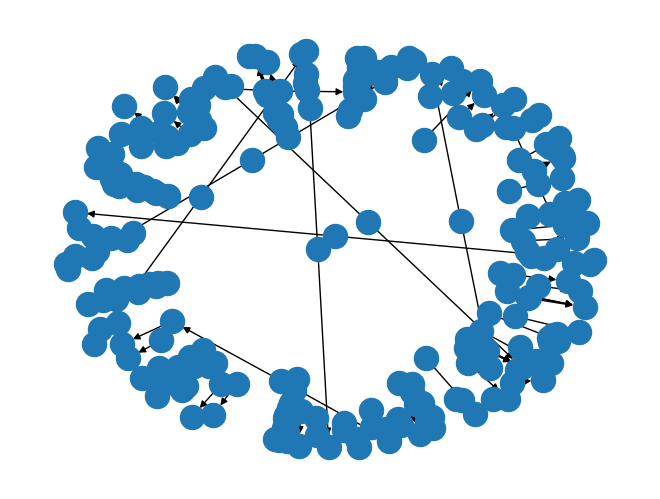

In [23]:
ilicit_ids = df_class_feature_unknown.loc[(df_class_feature_unknown['Time step'] == 20) & (df_class_feature_unknown['class'] == 1), 'txId']
ilicit_edges = df_edges_unknown.loc[df_edges_unknown['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

Epoch: 010, Loss: 0.4280, Test Acc: 0.8969
Epoch: 020, Loss: 0.3552, Test Acc: 0.9149
Epoch: 030, Loss: 0.3119, Test Acc: 0.9198
Epoch: 040, Loss: 0.2979, Test Acc: 0.9209
Epoch: 050, Loss: 0.2866, Test Acc: 0.9226
Epoch: 060, Loss: 0.2786, Test Acc: 0.9209
Epoch: 070, Loss: 0.2749, Test Acc: 0.9208
Epoch: 080, Loss: 0.2720, Test Acc: 0.9203
Epoch: 090, Loss: 0.2676, Test Acc: 0.9229
Epoch: 100, Loss: 0.2655, Test Acc: 0.9241
Epoch: 110, Loss: 0.2626, Test Acc: 0.9238
Epoch: 120, Loss: 0.2591, Test Acc: 0.9247
Epoch: 130, Loss: 0.2586, Test Acc: 0.9249
Epoch: 140, Loss: 0.2556, Test Acc: 0.9242
Epoch: 150, Loss: 0.2575, Test Acc: 0.9245
Epoch: 160, Loss: 0.2531, Test Acc: 0.9264
Epoch: 170, Loss: 0.2536, Test Acc: 0.9261
Epoch: 180, Loss: 0.2507, Test Acc: 0.9268
Epoch: 190, Loss: 0.2503, Test Acc: 0.9270
Epoch: 200, Loss: 0.2501, Test Acc: 0.9274


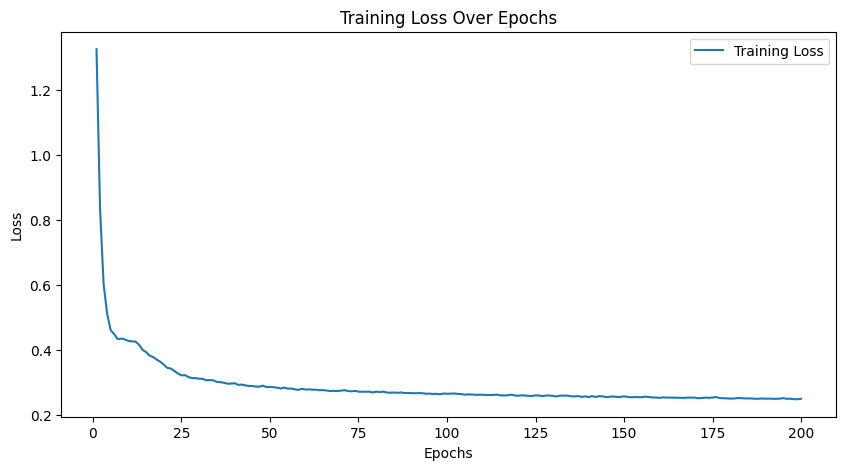

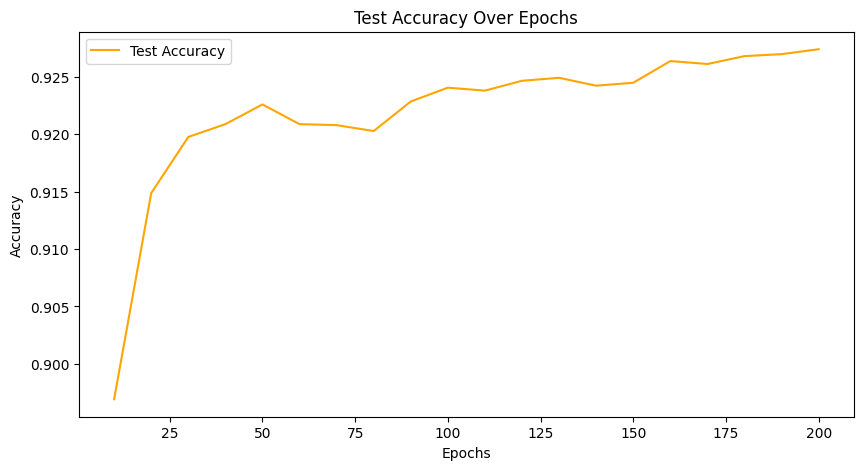

Final Test Accuracy: 0.9274
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10523
           1       0.86      0.29      0.43      1118

    accuracy                           0.93     11641
   macro avg       0.90      0.64      0.70     11641
weighted avg       0.92      0.93      0.91     11641



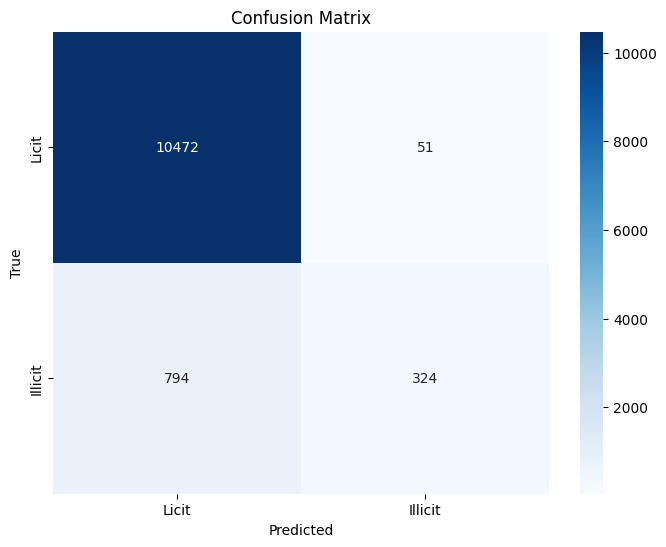

In [26]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# Rename columns for features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}
colNames = dict(colNames1, **colNames2, **colNames3)
colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}
df_features = df_features.rename(columns=colNames)

# Merge Class and Features
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_class_feature = pd.merge(df_classes, df_features)

# Prepare data for GCN
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids) & df_edges['txId2'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and Features for selected data
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected)

# Prepare node features (X) and labels (y)
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']).values
y = df_class_feature_selected['class'].apply(lambda x: 0 if x == '2' else 1).values

# Prepare edge list for graph
graph = nx.from_pandas_edgelist(df_edges_selected, source='txId1', target='txId2', create_using=nx.DiGraph())

# Convert to PyTorch Geometric Data
edge_index = from_networkx(graph).edge_index
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Split data into train and test
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.25, random_state=15)
data.train_mask = torch.tensor(train_mask, dtype=torch.long)
data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Define GCN Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = 2

model = GCN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train GCN Model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test GCN Model
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / len(data.test_mask)
    return test_acc, pred

# Training loop
losses = []
accuracies = []
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test()
        accuracies.append(acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 201, 10), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model
acc, pred = test()
print(f'Final Test Accuracy: {acc:.4f}')

# Classification report
y_true = y[data.test_mask]
y_pred = pred[data.test_mask].numpy()
print(classification_report(y_true, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch: 010, Loss: 0.2953, Test Acc: 0.9040
Epoch: 020, Loss: 0.2389, Test Acc: 0.9064
Epoch: 030, Loss: 0.2176, Test Acc: 0.9228
Epoch: 040, Loss: 0.2016, Test Acc: 0.9430
Epoch: 050, Loss: 0.1860, Test Acc: 0.9458
Epoch: 060, Loss: 0.1746, Test Acc: 0.9529
Epoch: 070, Loss: 0.1658, Test Acc: 0.9576
Epoch: 080, Loss: 0.1612, Test Acc: 0.9595
Epoch: 090, Loss: 0.1522, Test Acc: 0.9618
Epoch: 100, Loss: 0.1497, Test Acc: 0.9654
Epoch: 110, Loss: 0.1437, Test Acc: 0.9666
Epoch: 120, Loss: 0.1405, Test Acc: 0.9691
Epoch: 130, Loss: 0.1393, Test Acc: 0.9692
Epoch: 140, Loss: 0.1350, Test Acc: 0.9694
Epoch: 150, Loss: 0.1315, Test Acc: 0.9698
Epoch: 160, Loss: 0.1308, Test Acc: 0.9698
Epoch: 170, Loss: 0.1302, Test Acc: 0.9704
Epoch: 180, Loss: 0.1308, Test Acc: 0.9696
Epoch: 190, Loss: 0.1257, Test Acc: 0.9711
Epoch: 200, Loss: 0.1265, Test Acc: 0.9712


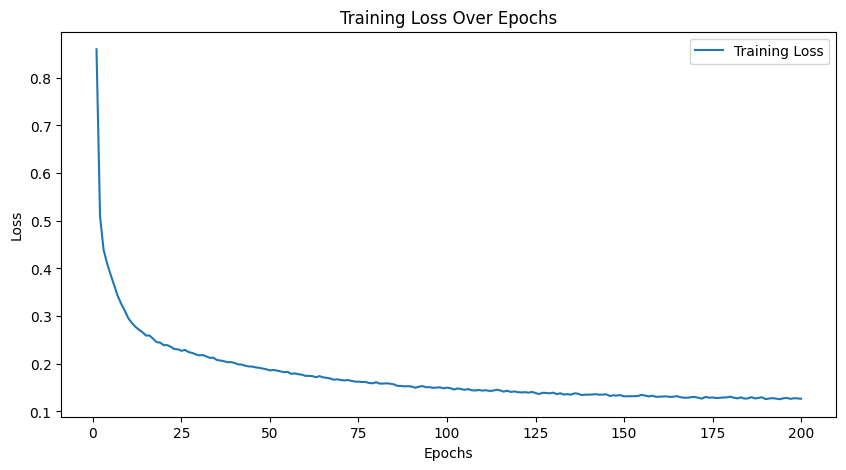

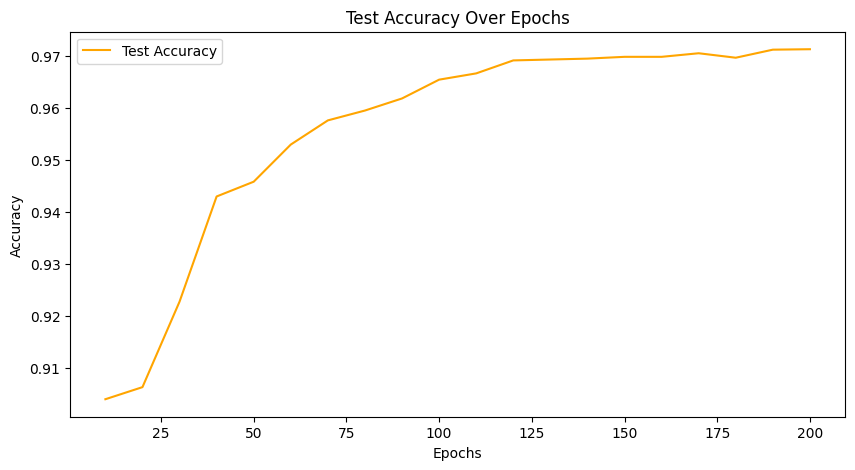

Final Test Accuracy: 0.9712
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10523
           1       0.93      0.76      0.84      1118

    accuracy                           0.97     11641
   macro avg       0.95      0.88      0.91     11641
weighted avg       0.97      0.97      0.97     11641



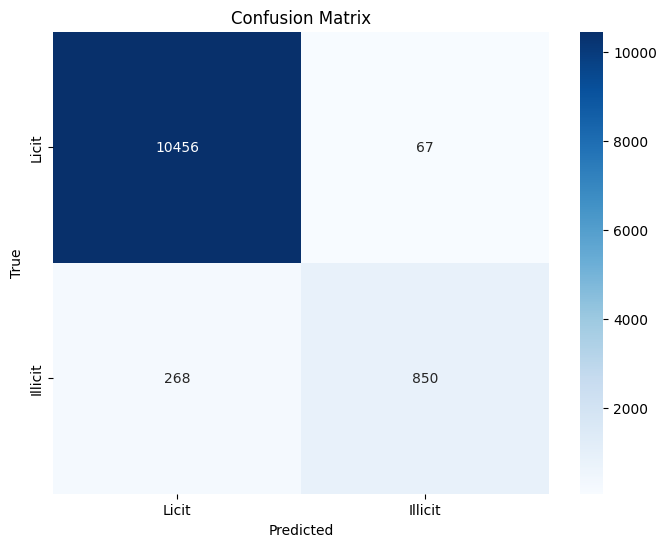

In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GraphConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# Rename columns for features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}
colNames = dict(colNames1, **colNames2, **colNames3)
colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}
df_features = df_features.rename(columns=colNames)

# Merge Class and Features
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_class_feature = pd.merge(df_classes, df_features)

# Prepare data for GCN
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids) & df_edges['txId2'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and Features for selected data
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected)

# Prepare node features (X) and labels (y)
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']).values
y = df_class_feature_selected['class'].apply(lambda x: 0 if x == '2' else 1).values

# Prepare edge list for graph
graph = nx.from_pandas_edgelist(df_edges_selected, source='txId1', target='txId2', create_using=nx.DiGraph())

# Convert to PyTorch Geometric Data
edge_index = from_networkx(graph).edge_index
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Split data into train and test
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.25, random_state=15)
data.train_mask = torch.tensor(train_mask, dtype=torch.long)
data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Define GNN Model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GraphConv(input_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = 2

model = GNN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train GNN Model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test GNN Model
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / len(data.test_mask)
    return test_acc, pred

# Training loop
losses = []
accuracies = []
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test()
        accuracies.append(acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 201, 10), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model
acc, pred = test()
print(f'Final Test Accuracy: {acc:.4f}')

# Classification report
y_true = y[data.test_mask]
y_pred = pred[data.test_mask].numpy()
print(classification_report(y_true, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch: 010, Loss: 0.3344, Test Acc: 0.9089
Epoch: 020, Loss: 0.2407, Test Acc: 0.9174
Epoch: 030, Loss: 0.2075, Test Acc: 0.9349
Epoch: 040, Loss: 0.1885, Test Acc: 0.9455
Epoch: 050, Loss: 0.1736, Test Acc: 0.9496
Epoch: 060, Loss: 0.1661, Test Acc: 0.9525
Epoch: 070, Loss: 0.1590, Test Acc: 0.9537
Epoch: 080, Loss: 0.1540, Test Acc: 0.9583
Epoch: 090, Loss: 0.1493, Test Acc: 0.9617
Epoch: 100, Loss: 0.1446, Test Acc: 0.9636
Epoch: 110, Loss: 0.1422, Test Acc: 0.9635
Epoch: 120, Loss: 0.1407, Test Acc: 0.9645
Epoch: 130, Loss: 0.1356, Test Acc: 0.9656
Epoch: 140, Loss: 0.1333, Test Acc: 0.9644
Epoch: 150, Loss: 0.1300, Test Acc: 0.9655
Epoch: 160, Loss: 0.1296, Test Acc: 0.9662
Epoch: 170, Loss: 0.1293, Test Acc: 0.9667
Epoch: 180, Loss: 0.1263, Test Acc: 0.9667
Epoch: 190, Loss: 0.1248, Test Acc: 0.9674
Epoch: 200, Loss: 0.1254, Test Acc: 0.9672


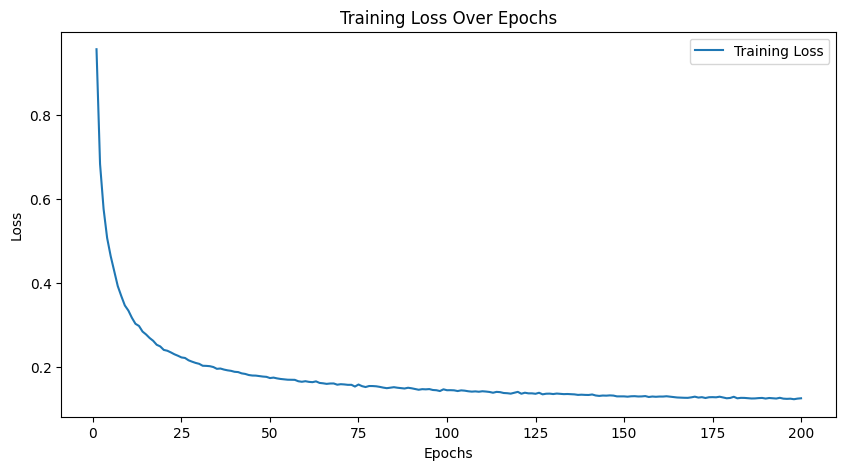

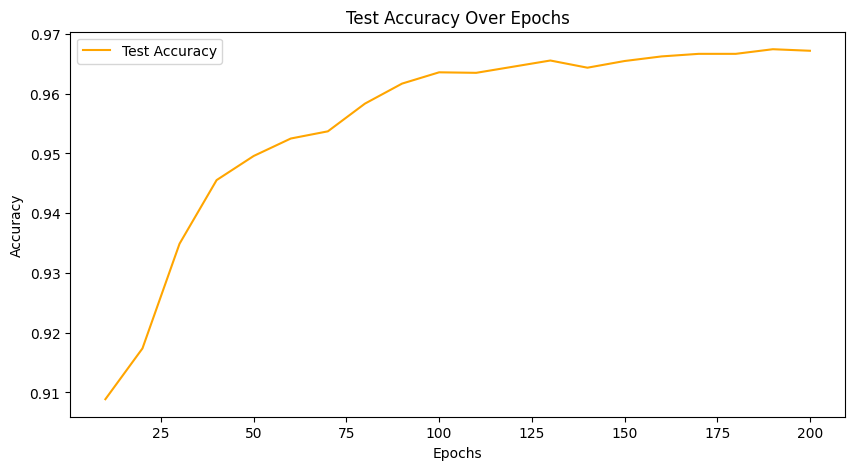

Final Test Accuracy: 0.9672
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10523
           1       0.93      0.71      0.81      1118

    accuracy                           0.97     11641
   macro avg       0.95      0.85      0.89     11641
weighted avg       0.97      0.97      0.97     11641



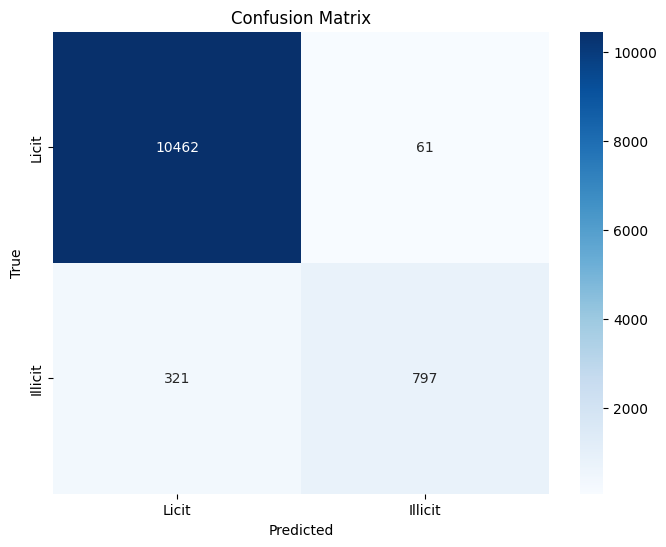

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10523
           1       0.95      0.81      0.87      1118

    accuracy                           0.98     11641
   macro avg       0.96      0.90      0.93     11641
weighted avg       0.98      0.98      0.98     11641



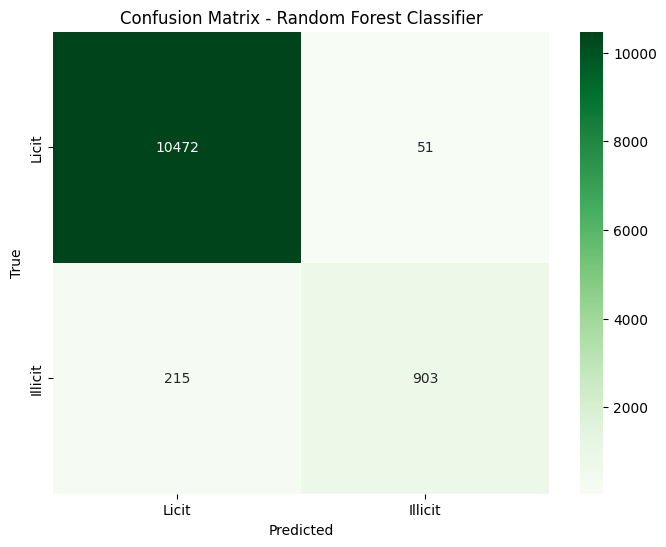

In [28]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GraphConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Load data
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# Rename columns for features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}
colNames = dict(colNames1, **colNames2, **colNames3)
colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}
df_features = df_features.rename(columns=colNames)

# Merge Class and Features
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_class_feature = pd.merge(df_classes, df_features)

# Prepare data for GCN
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids) & df_edges['txId2'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and Features for selected data
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected)

# Prepare node features (X) and labels (y)
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']).values
y = df_class_feature_selected['class'].apply(lambda x: 0 if x == '2' else 1).values

# Prepare edge list for graph
graph = nx.from_pandas_edgelist(df_edges_selected, source='txId1', target='txId2', create_using=nx.DiGraph())

# Convert to PyTorch Geometric Data
edge_index = from_networkx(graph).edge_index
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Split data into train and test
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.25, random_state=15)
data.train_mask = torch.tensor(train_mask, dtype=torch.long)
data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Define GNN Model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GraphConv(input_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = 2

model = GNN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train GNN Model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test GNN Model
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / len(data.test_mask)
    return test_acc, pred

# Training loop
losses = []
accuracies = []
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test()
        accuracies.append(acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 201, 10), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model
acc, pred = test()
print(f'Final Test Accuracy: {acc:.4f}')

# Classification report
y_true = y[data.test_mask]
y_pred = pred[data.test_mask].numpy()
print(classification_report(y_true, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extract embeddings from the GNN model
model.eval()
with torch.no_grad():
    embeddings = model.conv1(data.x, data.edge_index).numpy()

# Train a Random Forest Classifier on the extracted embeddings
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.25, random_state=15)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_rf_pred))

# Visualize the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


Epoch: 010, Loss: 0.3907, Test Acc: 0.9059
Epoch: 020, Loss: 0.2849, Test Acc: 0.9134
Epoch: 030, Loss: 0.2418, Test Acc: 0.9223
Epoch: 040, Loss: 0.2242, Test Acc: 0.9294
Epoch: 050, Loss: 0.2131, Test Acc: 0.9305
Epoch: 060, Loss: 0.2058, Test Acc: 0.9348
Epoch: 070, Loss: 0.1981, Test Acc: 0.9370
Epoch: 080, Loss: 0.1928, Test Acc: 0.9399
Epoch: 090, Loss: 0.1888, Test Acc: 0.9418
Epoch: 100, Loss: 0.1827, Test Acc: 0.9435
Epoch: 110, Loss: 0.1811, Test Acc: 0.9458
Epoch: 120, Loss: 0.1797, Test Acc: 0.9473
Epoch: 130, Loss: 0.1777, Test Acc: 0.9480
Epoch: 140, Loss: 0.1722, Test Acc: 0.9490
Epoch: 150, Loss: 0.1709, Test Acc: 0.9492
Epoch: 160, Loss: 0.1698, Test Acc: 0.9503
Epoch: 170, Loss: 0.1671, Test Acc: 0.9522
Epoch: 180, Loss: 0.1677, Test Acc: 0.9514
Epoch: 190, Loss: 0.1646, Test Acc: 0.9519
Epoch: 200, Loss: 0.1635, Test Acc: 0.9514


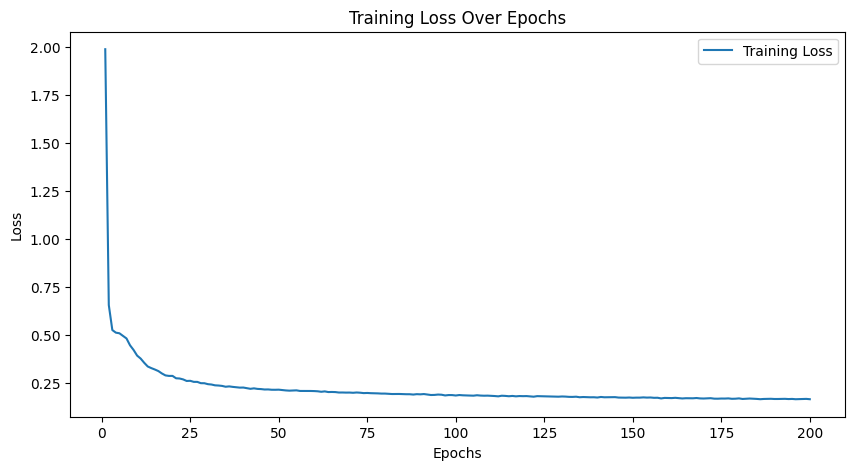

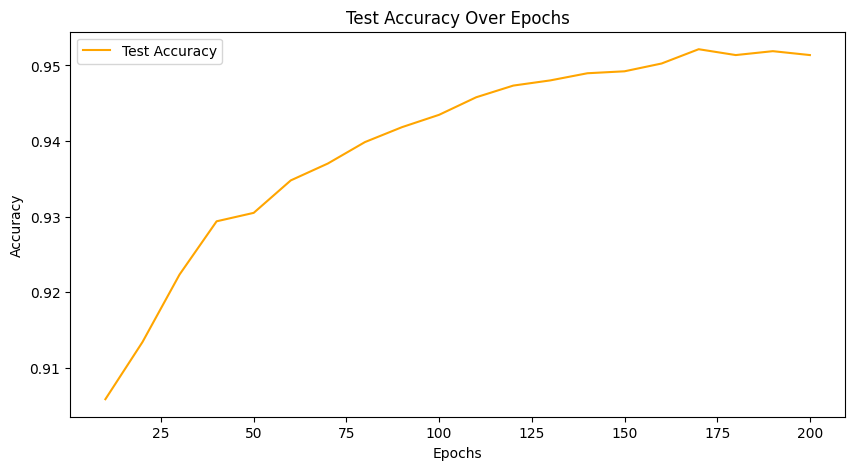

Final Test Accuracy: 0.9514
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10523
           1       0.81      0.64      0.72      1118

    accuracy                           0.95     11641
   macro avg       0.89      0.81      0.85     11641
weighted avg       0.95      0.95      0.95     11641



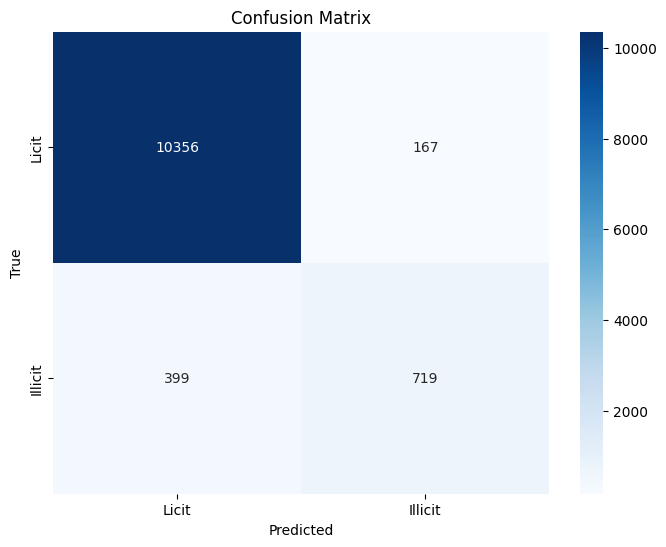

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10523
           1       0.92      0.73      0.81      1118

    accuracy                           0.97     11641
   macro avg       0.95      0.86      0.90     11641
weighted avg       0.97      0.97      0.97     11641



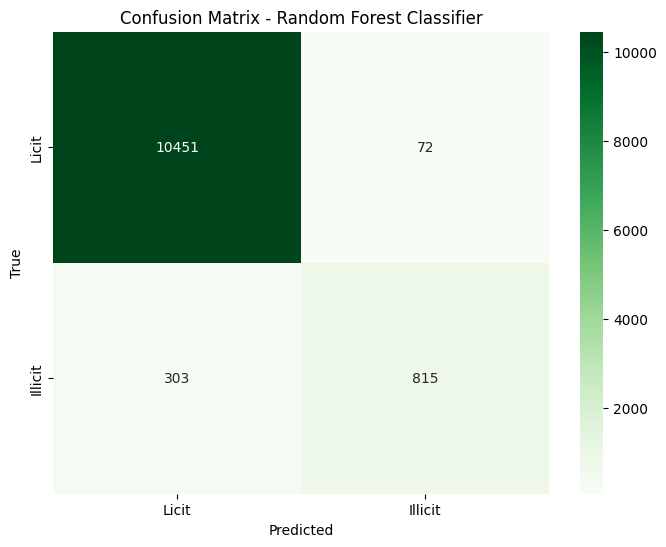

In [29]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# Load data
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# Rename columns for features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}
colNames = dict(colNames1, **colNames2, **colNames3)
colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}
df_features = df_features.rename(columns=colNames)

# Merge Class and Features
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_class_feature = pd.merge(df_classes, df_features)

# Prepare data for GCN
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids) & df_edges['txId2'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and Features for selected data
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected)

# Prepare node features (X) and labels (y)
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']).values
y = df_class_feature_selected['class'].apply(lambda x: 0 if x == '2' else 1).values

# Prepare edge list for graph
graph = nx.from_pandas_edgelist(df_edges_selected, source='txId1', target='txId2', create_using=nx.DiGraph())

# Convert to PyTorch Geometric Data
edge_index = from_networkx(graph).edge_index
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Split data into train and test
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.25, random_state=15)
data.train_mask = torch.tensor(train_mask, dtype=torch.long)
data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Define GAT Model
class GAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=1):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads, concat=True)
        self.conv2 = GATConv(hidden_dim * heads, output_dim, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = 2

model = GAT(input_dim, hidden_dim, output_dim, heads=4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train GAT Model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test GAT Model
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / len(data.test_mask)
    return test_acc, pred

# Training loop
losses = []
accuracies = []
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test()
        accuracies.append(acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 201, 10), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model
acc, pred = test()
print(f'Final Test Accuracy: {acc:.4f}')

# Classification report
y_true = y[data.test_mask]
y_pred = pred[data.test_mask].numpy()
print(classification_report(y_true, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extract embeddings from the GAT model
model.eval()
with torch.no_grad():
    embeddings = model.conv1(data.x, data.edge_index).numpy()

# Train a Random Forest Classifier on the extracted embeddings
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.25, random_state=15)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest Classifier
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, y_rf_pred))

# Visualize the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


Epoch: 010, Loss: 0.3531, Test Acc: 0.9187
Epoch: 020, Loss: 0.2660, Test Acc: 0.9173
Epoch: 030, Loss: 0.2388, Test Acc: 0.9162
Epoch: 040, Loss: 0.2211, Test Acc: 0.9265
Epoch: 050, Loss: 0.2103, Test Acc: 0.9295
Epoch: 060, Loss: 0.2038, Test Acc: 0.9324
Epoch: 070, Loss: 0.1973, Test Acc: 0.9369
Epoch: 080, Loss: 0.1907, Test Acc: 0.9400
Epoch: 090, Loss: 0.1878, Test Acc: 0.9420
Epoch: 100, Loss: 0.1831, Test Acc: 0.9437
Epoch: 110, Loss: 0.1814, Test Acc: 0.9451
Epoch: 120, Loss: 0.1765, Test Acc: 0.9452
Epoch: 130, Loss: 0.1757, Test Acc: 0.9455
Epoch: 140, Loss: 0.1730, Test Acc: 0.9469
Epoch: 150, Loss: 0.1721, Test Acc: 0.9467
Epoch: 160, Loss: 0.1699, Test Acc: 0.9470
Epoch: 170, Loss: 0.1689, Test Acc: 0.9479
Epoch: 180, Loss: 0.1682, Test Acc: 0.9480
Epoch: 190, Loss: 0.1677, Test Acc: 0.9485
Epoch: 200, Loss: 0.1677, Test Acc: 0.9497


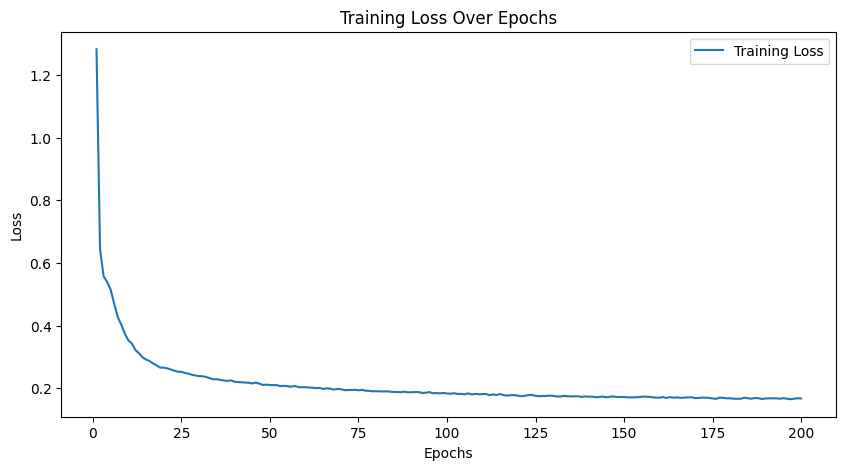

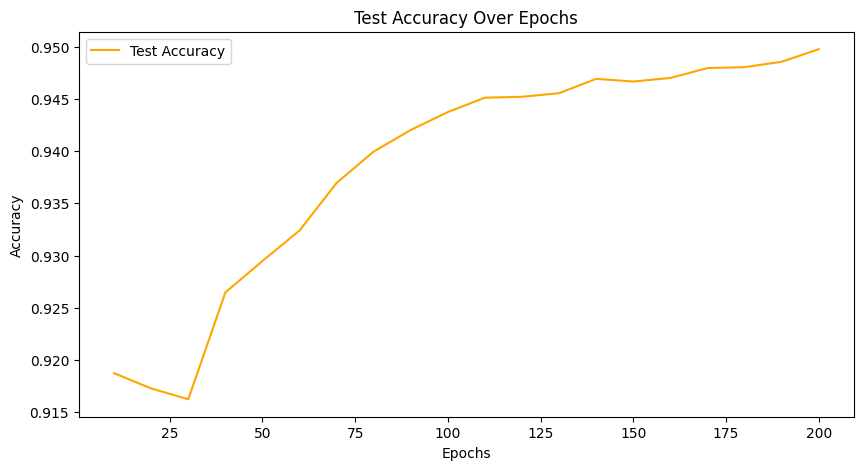

C:\Users\ayush\AppData\Local\Temp\ipykernel_46036\2600436555.py:156: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_lstm = torch.tensor(y, dtype=torch.long)


LSTM Epoch: 010, Loss: 0.3537, Test Acc: 0.9040
LSTM Epoch: 020, Loss: 0.2027, Test Acc: 0.9490
LSTM Epoch: 030, Loss: 0.1472, Test Acc: 0.9546
LSTM Epoch: 040, Loss: 0.1317, Test Acc: 0.9587
LSTM Epoch: 050, Loss: 0.1232, Test Acc: 0.9594
LSTM Epoch: 060, Loss: 0.1166, Test Acc: 0.9611
LSTM Epoch: 070, Loss: 0.1117, Test Acc: 0.9621
LSTM Epoch: 080, Loss: 0.1079, Test Acc: 0.9625
LSTM Epoch: 090, Loss: 0.1046, Test Acc: 0.9629
LSTM Epoch: 100, Loss: 0.1017, Test Acc: 0.9635


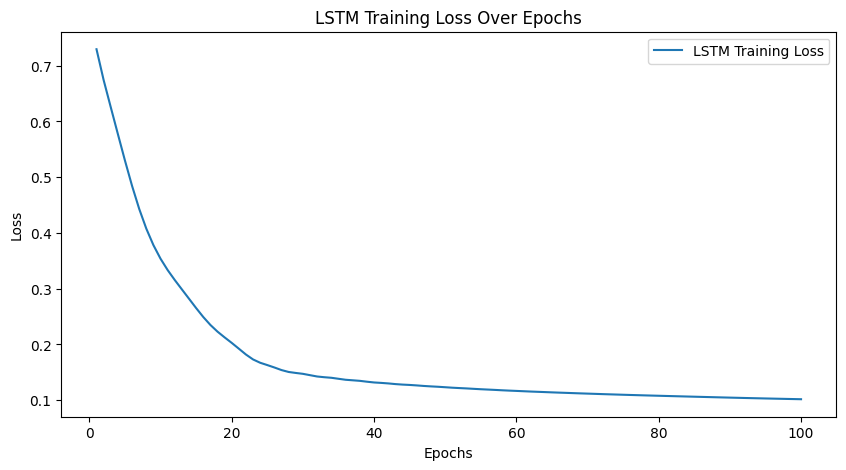

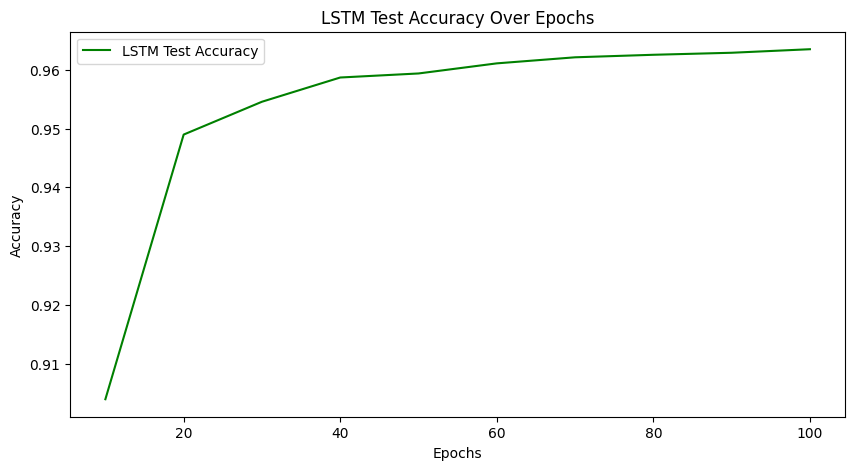

XGBoost Classifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42019
           1       0.98      0.96      0.97      4545

    accuracy                           0.99     46564
   macro avg       0.99      0.98      0.99     46564
weighted avg       0.99      0.99      0.99     46564



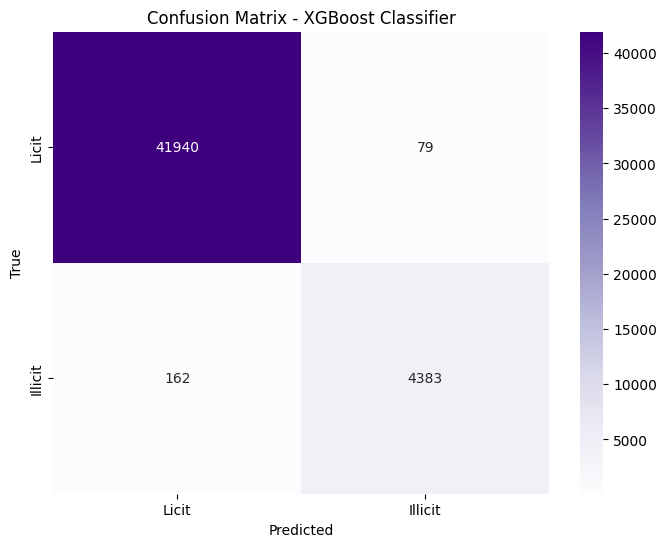

In [32]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch_geometric.utils import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from torch import nn

# Load data
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edges = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv", header=None)

# Rename columns for features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}
colNames = dict(colNames1, **colNames2, **colNames3)
colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}
df_features = df_features.rename(columns=colNames)

# Merge Class and Features
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_class_feature = pd.merge(df_classes, df_features)

# Prepare data for GCN
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids) & df_edges['txId2'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and Features for selected data
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected)

# Prepare node features (X) and labels (y)
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']).values
y = df_class_feature_selected['class'].apply(lambda x: 0 if x == '2' else 1).values

# Prepare edge list for graph
graph = nx.from_pandas_edgelist(df_edges_selected, source='txId1', target='txId2', create_using=nx.DiGraph())

# Convert to PyTorch Geometric Data
edge_index = from_networkx(graph).edge_index
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Split data into train and test
train_mask, test_mask = train_test_split(range(data.num_nodes), test_size=0.25, random_state=15)
data.train_mask = torch.tensor(train_mask, dtype=torch.long)
data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Define GAT Model
class GAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=1):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads, concat=True)
        self.conv2 = GATConv(hidden_dim * heads, output_dim, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
input_dim = X.shape[1]
hidden_dim = 16
output_dim = 2

model = GAT(input_dim, hidden_dim, output_dim, heads=4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train GAT Model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test GAT Model
def test():
    model.eval()
    _, pred = model(data).max(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / len(data.test_mask)
    return test_acc, pred

# Training loop
losses = []
accuracies = []
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test()
        accuracies.append(acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 201, 10), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Extract embeddings from the GAT model
model.eval()
with torch.no_grad():
    embeddings = model.conv1(data.x, data.edge_index).numpy()

# Train an LSTM model on the embeddings
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h_t, _ = self.lstm(x)
        h_t = h_t[:, -1, :]
        out = self.fc(h_t)
        return F.log_softmax(out, dim=1)

# Prepare data for LSTM
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)
X_lstm = torch.tensor(embeddings_scaled, dtype=torch.float).unsqueeze(1)  # Adding a sequence dimension
y_lstm = torch.tensor(y, dtype=torch.long)

# Split data for LSTM
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=15)

# Initialize LSTM model
lstm_hidden_dim = 32
lstm_output_dim = 2
lstm_model = LSTMModel(input_dim=embeddings.shape[1], hidden_dim=lstm_hidden_dim, output_dim=lstm_output_dim)
lstm_optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.01)

# Train LSTM Model
def train_lstm():
    lstm_model.train()
    lstm_optimizer.zero_grad()
    out = lstm_model(X_train)
    loss = F.nll_loss(out, y_train)
    loss.backward()
    lstm_optimizer.step()
    return loss.item()

# Test LSTM Model
def test_lstm():
    lstm_model.eval()
    with torch.no_grad():
        out = lstm_model(X_test)
        _, pred = out.max(dim=1)
        test_correct = pred == y_test
        test_acc = int(test_correct.sum()) / len(y_test)
    return test_acc, pred

# Training loop for LSTM
lstm_losses = []
lstm_accuracies = []
for epoch in range(1, 101):
    loss = train_lstm()
    lstm_losses.append(loss)
    if epoch % 10 == 0:
        acc, _ = test_lstm()
        lstm_accuracies.append(acc)
        print(f'LSTM Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}')

# Plot LSTM training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), lstm_losses, label='LSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot LSTM test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(10, 101, 10), lstm_accuracies, label='LSTM Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Test Accuracy Over Epochs')
plt.legend()
plt.show()

# Extract LSTM embeddings
lstm_model.eval()
with torch.no_grad():
    lstm_embeddings = lstm_model.lstm(X_lstm)[0][:, -1, :].numpy()

# Train an XGBoost Classifier on the LSTM embeddings
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(lstm_embeddings, y)
y_xgb_pred = xgb_classifier.predict(lstm_embeddings)

# Evaluate the XGBoost Classifier
print("XGBoost Classifier Evaluation:")
print(classification_report(y, y_xgb_pred))

# Visualize the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y, y_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=['Licit', 'Illicit'], yticklabels=['Licit', 'Illicit'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


In [31]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.2/124.9 MB 31.7 MB/s eta 0:00:04
   ---- ----------------------------------- 13.6/124.9 MB 35.7 MB/s eta 0:00:04
   ------ --------------------------------- 20.7/124.9 MB 35.3 MB/s eta 0:00:03
   --------- ------------------------------ 28.3/124.9 MB 36.6 MB/s eta 0:00:03
   ----------- ---------------------------- 35.7/124.9 MB 35.9 MB/s eta 0:00:03
   -------------- ------------------------- 44.0/124.9 MB 36.4 MB/s eta 0:00:03
   ---------------- ----------------------- 52.2/124.9 MB 36.9 MB/s eta 0:00:02
   ------------------- -------------------- 59.8/124.9 MB 37.0 MB/s eta 0:00:02
   --------------------- ------------------ 67.9/124.9 MB 37.0 MB/s eta 0:00:02
   ------------------------ --------------- 75.8/124.9 MB 36.9 MB/s eta 0:00:02
   -------------------------- ------------- 83.1/124.9 MB 36.6 MB/s eta 0:00:02
   ---------------------------- ----------- 90.2/1